# K primeiros vizinhos

In [30]:
# Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
# Importando os dados
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset = pd.read_csv('DADOSTESTE.csv')
X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, -1].values

In [72]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [73]:
print(X_train)

[[1.9600e+01 1.4270e+03]
 [3.9600e+01 2.4668e+04]
 [4.0800e+01 3.8058e+04]
 [4.2200e+01 4.4663e+04]
 [2.7300e+01 3.7927e+04]
 [3.1900e+01 1.8556e+04]
 [4.6600e+01 4.6117e+04]
 [1.6800e+01 7.7710e+03]
 [4.1400e+01 4.4868e+04]
 [3.8300e+01 5.5334e+04]
 [3.3500e+01 1.4033e+04]
 [3.8700e+01 1.3101e+04]
 [4.2400e+01 6.8402e+04]
 [3.5400e+01 2.2104e+04]]


In [74]:
print(y_train)

[1 0 0 0 0 1 0 1 0 0 0 0 1 0]


In [75]:
print(X_test)

[[4.8200e+01 3.8673e+04]
 [4.6200e+01 2.7035e+04]
 [4.2000e+01 3.8516e+04]
 [2.5400e+01 6.6950e+03]]


In [76]:
print(y_test)

[0 0 0 1]


In [77]:
# Feature Scaling
#standardisation (dados mais ou menos entre -3 e 3)
#x_Stand = (x-mean(x))/(standard deviation (x))
#normalisation (Dados entre zero e um)
#x_norm = (x-min(x))/(max(x)-min(x))
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[-1.86040445 -1.5775344 ]
 [ 0.50630725 -0.34677682]
 [ 0.64830996  0.36230815]
 [ 0.81397978  0.71208457]
 [-0.94922045  0.35537088]
 [-0.40487675 -0.67044578]
 [ 1.33465635  0.78908305]
 [-2.19174409 -1.24157958]
 [ 0.71931131  0.72294062]
 [ 0.35247099  1.27718135]
 [-0.21553982 -0.90996717]
 [ 0.39980523 -0.95932245]
 [ 0.83764689  1.96921439]
 [ 0.0092978  -0.4825568 ]]


In [78]:
print(X_test)

[[ 1.52399329  0.39487628]
 [ 1.28732212 -0.22142924]
 [ 0.79031266  0.38656214]
 [-1.17405806 -1.29856056]]


In [79]:
# Trainando o modelo K-NN no conjunto de treino
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [80]:
# Prevendo um resultado
print(classifier.predict(sc.transform([[60000,40]])))

[0]


In [81]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]]


In [82]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

In [83]:
print(cm)

[[3 0]
 [0 1]]


In [84]:
accuracy_score(y_test, y_pred)

1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


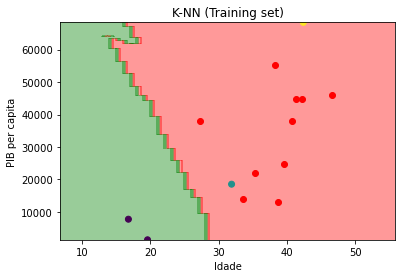

In [87]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.4, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Idade')
plt.ylabel('PIB per capita')
#plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


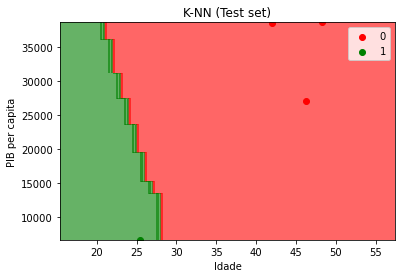

In [89]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Idade')
plt.ylabel('PIB per capita')
plt.legend()
plt.show()